In [8]:
import pandas as pd

# ===Chargement du dataset===
df = pd.read_csv("housing_price_dataset.csv")
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


50000


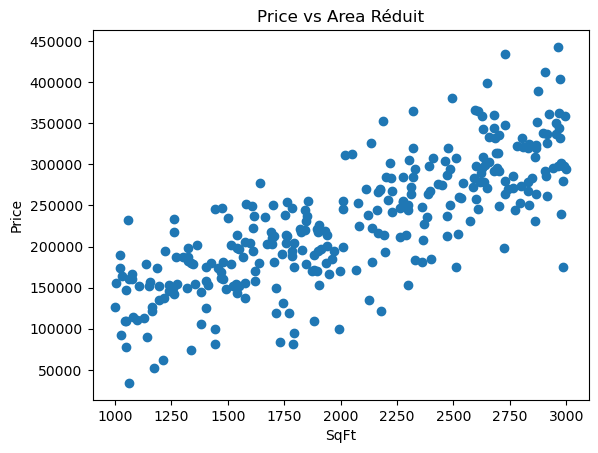

In [9]:
import matplotlib.pyplot as plt

print(len(df))

# ===prix vs surface===
df_sample = df.sample(n=300, random_state=42)

# Vérifier la corrélation entre le prix et les mètres carrés
plt.scatter(df_sample["SquareFeet"], df_sample["Price"])
plt.title("Price vs Area Réduit")
plt.xlabel("SqFt")
plt.ylabel("Price")
plt.show()

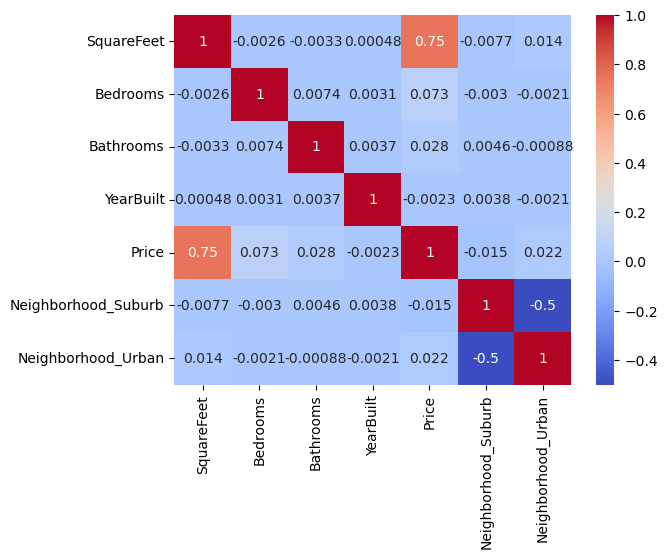

hello


In [10]:
import seaborn as sns

# === Encodage des variables catégorielles ===
# On encode les string par des booléens sinon problème avec la heatmap de seaborn
df_encoded = pd.get_dummies(df, drop_first=True)
df_corr = df_encoded.corr()

sns.heatmap(df_corr, annot=True, cmap="coolwarm")
plt.show()
print("hello")

R² train : 0.5619134435538305
R² test  : 0.5703289305615943
RMSE : 49661.77503452086
Prix prédiction LinearRegression pour  174530.52689558832 dollars


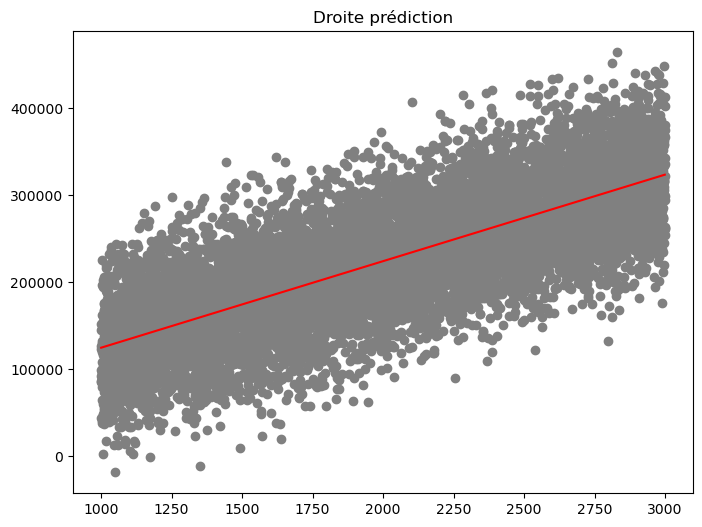

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# === Régression Linéaire ===
# Grâce à la heatmap, on remarque que ce sont les mètres carrés qui ont une forte influence sur le prix.
# Donc en premier, on fait une régression linéaire avec comme seul paramètre les mètres carrés.
# Et ensuite, on ajoute en plus le nombre de lits et de salles de bain.

# === Premier TEST ===
# === Données ===
X = df[["SquareFeet"]]
Y = df["Price"]

# === Séparation train/test ===
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# === Entraînement ===
model1 = LinearRegression()
model1.fit(X_train, Y_train)

# === Prédictions ===
Y_prediction = model1.predict(X_test)

# === Scores ===
r2_train = model1.score(X_train, Y_train)
r2_test = r2_score(Y_test, Y_prediction)
mse = mean_squared_error(Y_test, Y_prediction)
rmse = np.sqrt(mse)

print("R² train :", r2_train)
print("R² test  :", r2_test)
print("RMSE :", rmse)

# ===Affichage de la droite===
a_lr = model1.coef_[0]
b_lr = model1.intercept_

plt.figure(figsize=(8, 6))

plt.scatter(X_test, Y_test, color="gray")

x_range = np.linspace(X_test.min(), X_test.max(), 100)
y_lr = a_lr * x_range + b_lr
plt.plot(x_range, y_lr, color="red")
plt.title("Droite prédiction")

### TEST PREDICTION ###

area = pd.DataFrame([[1500]], columns=["SquareFeet"])
price_lr = model1.predict(area)
print("Prix prédiction LinearRegression pour ", price_lr[0], "dollars")


In [12]:
### TEST AVEC SGDRegressor ###

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

# === Split train / test ===
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# ===Modèle SGD: régression linéaire optimisée par descente de gradient===
# - StandardScaler : indispensable pour stabiliser et accélérer la descente de gradient
# - loss='squared_error' : fonction de coût classique
# - learning_rate='adaptive' + eta0 : pas de départ puis adaptation
# On ajuste alpha / eta0 si besoin.
model_sgd = make_pipeline(
    StandardScaler(),
    SGDRegressor(
        loss="squared_error",
        alpha=1e-4,
        learning_rate="adaptive",
        eta0=0.01,
        max_iter=2000,
        tol=1e-3,
        random_state=42,
    )
)

# ===Entraînement===
model_sgd.fit(X_train, Y_train)

# === Prédictions ===
Y_pred = model_sgd.predict(X_test)

# ===Scores===
r2_trainv2 = model_sgd.score(X_train, Y_train)
r2_testv2  = r2_score(Y_test, Y_pred)
msev2      = mean_squared_error(Y_test, Y_pred)
rmsev2     = np.sqrt(msev2)

print("R² train :", r2_trainv2)
print("R² test  :", r2_testv2)
print("RMSE :", rmsev2)

### TEST PREDICTION ###

area = pd.DataFrame([[1500]], columns=["SquareFeet"])
price_sgd = model_sgd.predict(area)
print(f"SGDRegressor : Prix prédit pour 1500 SqFt : {price_sgd[0]} dollars")

R² train : 0.5619134228166627
R² test  : 0.5703289410806489
RMSE : 49661.774426619886
SGDRegressor : Prix prédit pour 1500 SqFt : 174545.14505311596 dollars


In [16]:
# === Données ===
Xv2 = df[["SquareFeet", "Bedrooms", "Bathrooms", "YearBuilt"]]
Y = df["Price"]

# === Séparation train/test ===
X_trainv2, X_testv2, Y_trainv2, Y_testv2 = train_test_split(Xv2, Y, test_size=0.2, random_state=42)

# === Entraînement ===
model2 = LinearRegression()
model2.fit(X_trainv2, Y_trainv2)

# === Prédictions ===
Y_predictionv2 = model2.predict(X_testv2)

# === Scores ===
r2_trainv2 = model2.score(X_trainv2, Y_trainv2)
r2_testv2 = r2_score(Y_testv2, Y_predictionv2)
msev2 = mean_squared_error(Y_testv2, Y_predictionv2)
rmsev2 = np.sqrt(msev2)

print("R² train :", r2_trainv2)
print("R² test  :", r2_testv2)
print("RMSE :", rmsev2)

R² train : 0.568769787094187
R² test  : 0.5753110968712398
RMSE : 49373.01385696685


In [17]:
# On ramrque une légère amélioration au niveau des erreurs quadratiques (+ 0,05)
# Mais très léger, donc pas de réelle amélioration notable
# J'en conclus que l'ajout du paramètre "Neighboorhood" n'améliorera pas significativement le modèle
# Mais on peut tester 

In [19]:
# === Encoder uniquement Suburb et Urban (baseline = Rural) ===
df = df.copy()
df["Neighborhood_Suburb"] = (df["Neighborhood"] == "Suburb").astype(int)
df["Neighborhood_Urban"]  = (df["Neighborhood"] == "Urban").astype(int)

# === Données ===
Xv3 = df[["SquareFeet", "Bedrooms", "Bathrooms", "YearBuilt",
          "Neighborhood_Suburb", "Neighborhood_Urban"]]
Y = df["Price"]

# === Split ===
X_trainv3, X_testv3, Y_trainv3, Y_testv3 = train_test_split(
    Xv3, Y, test_size=0.2, random_state=42
)

# === Entraînement ===
model3 = LinearRegression()
model3.fit(X_trainv3, Y_trainv3)

# === Prédictions ===
Y_predv3 = model3.predict(X_testv3)

# === Scores ===
r2_trainv3 = model3.score(X_trainv3, Y_trainv3)
r2_testv3  = r2_score(Y_testv3, Y_predv3)
rmsev3     = np.sqrt(mean_squared_error(Y_testv3, Y_predv3))

print("R² train :", r2_trainv3)
print("R² test  :", r2_testv3)
print("RMSE :", rmsev3)


R² train : 0.5688921898995294
R² test  : 0.5755628630306235
RMSE : 49358.376911191546


In [ ]:
# On remarque une légère augmentation comme prévu : +0.002
# Donc j'en conclus que le prix s'explique en grande partie par les mètres carrés
# Ce qui est logique et correspond à la réalité